# MASINSKO UCENJE DRUGI PROJEKAT
---

*Nada Jovanovic 1618*  
*Milica Jovanovic 1636*


## Import
---

In [467]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

## Dataset
---

In [468]:
data = pd.read_csv("data.csv")
data = data.drop(columns = [data.columns[0]])
data1 = pd.read_csv("data.csv")
data1 = data1.drop(columns = [data1.columns[0]])
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [ ]:
data.describe()


## Vizuelizacija podataka
---


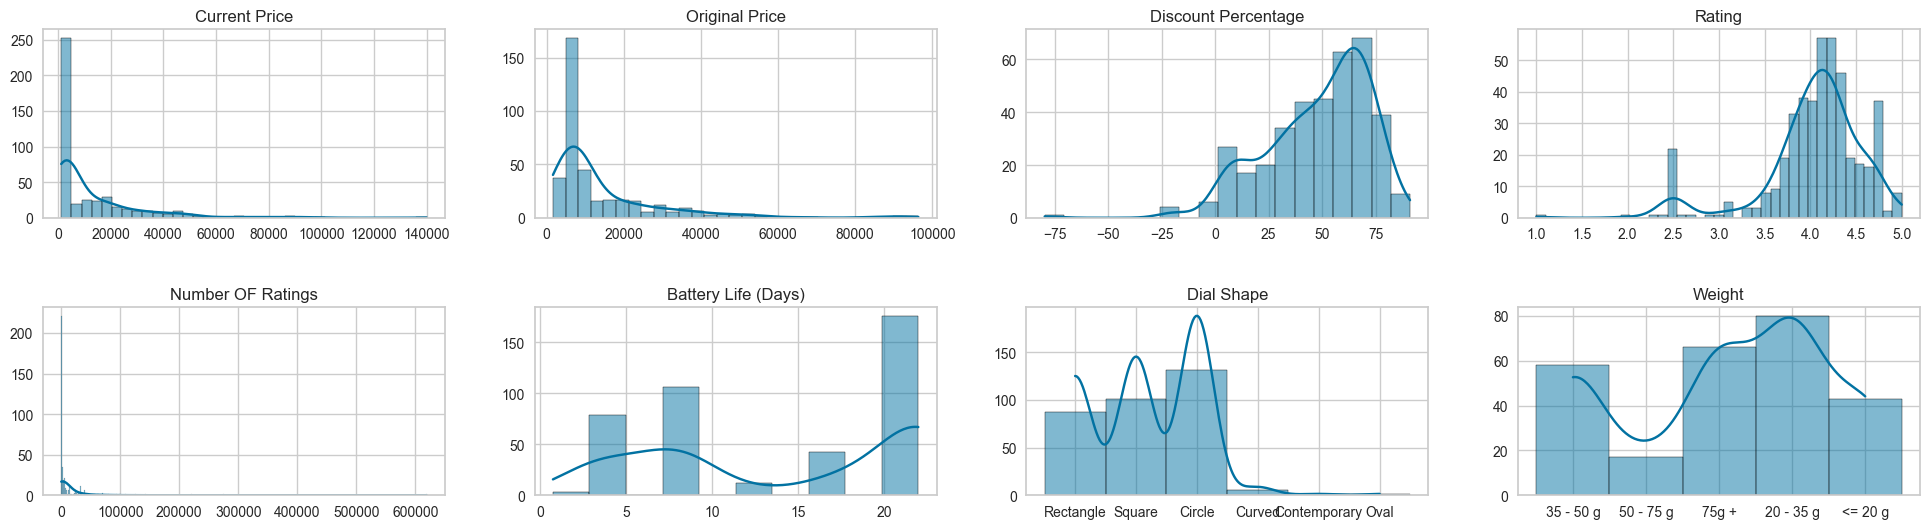

In [108]:
columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = pyplot.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

Moze se uociti da **Current Price**, **Original Price** i **Number OF Rating** imaju neke ekstremne vrednosti koje bi mozda trebalo ukloniti, dok **Discount percentage** sadrzi negetivne vrednosti koje treba prebaciti u pozitivne.

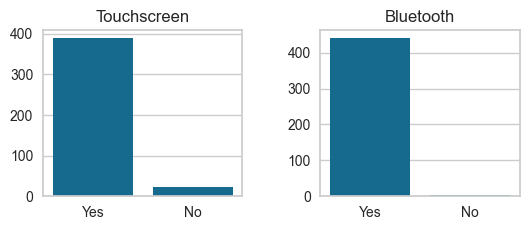

In [109]:
columns_num = ['Touchscreen', 'Bluetooth']

fig, axes = pyplot.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

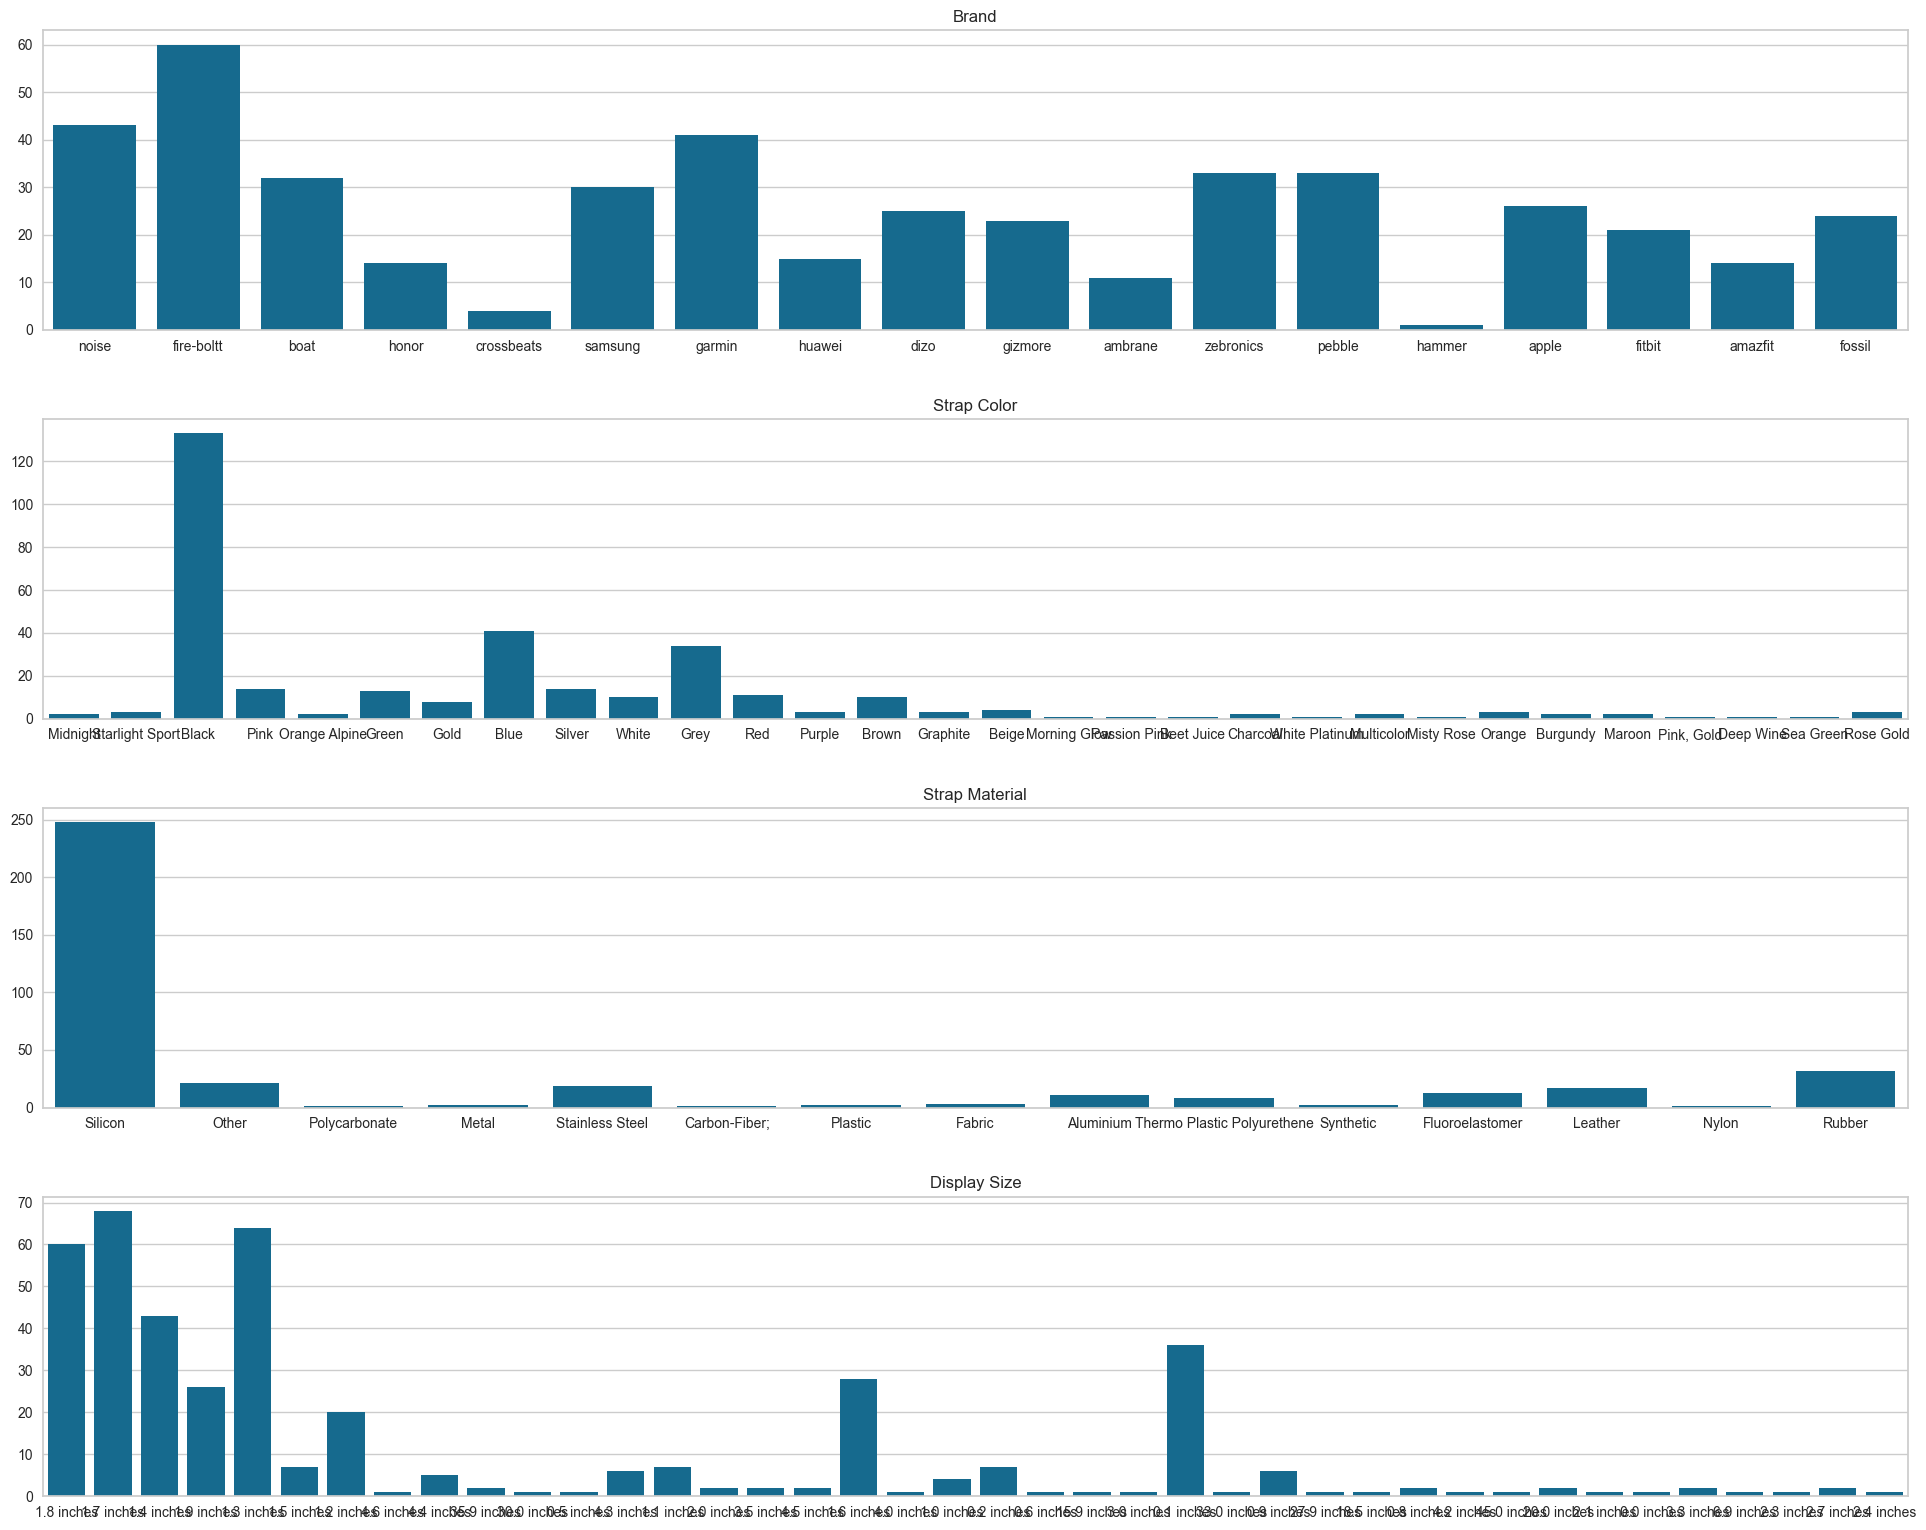

In [112]:
columns_num = ['Brand', 'Strap Color', 'Strap Material', 'Display Size']

fig, axes = pyplot.subplots(4, 1, figsize=(20, 16))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].FontSize = 5

pyplot.tight_layout()
pyplot.show()

### Missing values

In [26]:
nan_count = data.isnull().sum().sort_values()
print('Number of NaN values:')
print(nan_count)

# n_miss = {}

# for column in data.columns:
#     # count number of rows with missing values
#     n_miss[column] = {}
#     n_miss[column]["Count"] = data[column].isnull().sum()
#     n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

# pd.DataFrame.from_dict(n_miss).T


Number of NaN values:
Brand                    0
Rating                   6
Bluetooth                6
Current Price           10
Display Size            30
Battery Life (Days)     32
Model Name              33
Touchscreen             37
Number OF Ratings       59
Strap Material          66
Original Price          73
Discount Percentage     73
Dial Shape             113
Strap Color            113
Weight                 186
dtype: int64


<Axes: >

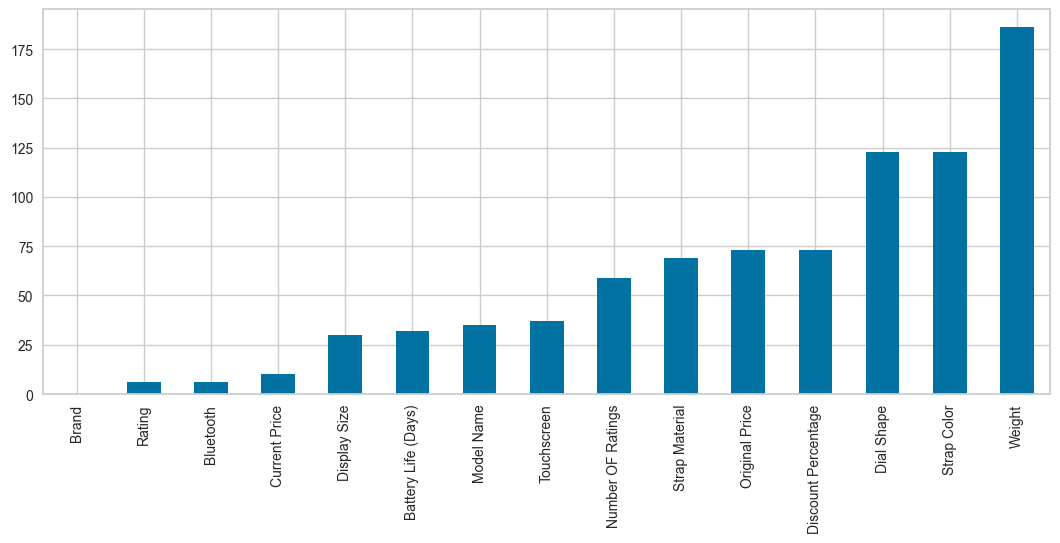

In [27]:
nan_count = data.isnull().sum().sort_values()
print('Number of NaN values:', nan_count)
nan_count.plot(kind='bar', figsize=(13, 5))

In [62]:
print("Number Of Rows In The Original DataFrame:", len(data))
print("Number Of Rows After Deduping:", len(data.drop_duplicates()))

Number Of Rows In The Original DataFrame: 450
Number Of Rows After Deduping: 440


In [63]:
data = data.drop_duplicates()
data1 = data1.drop_duplicates()

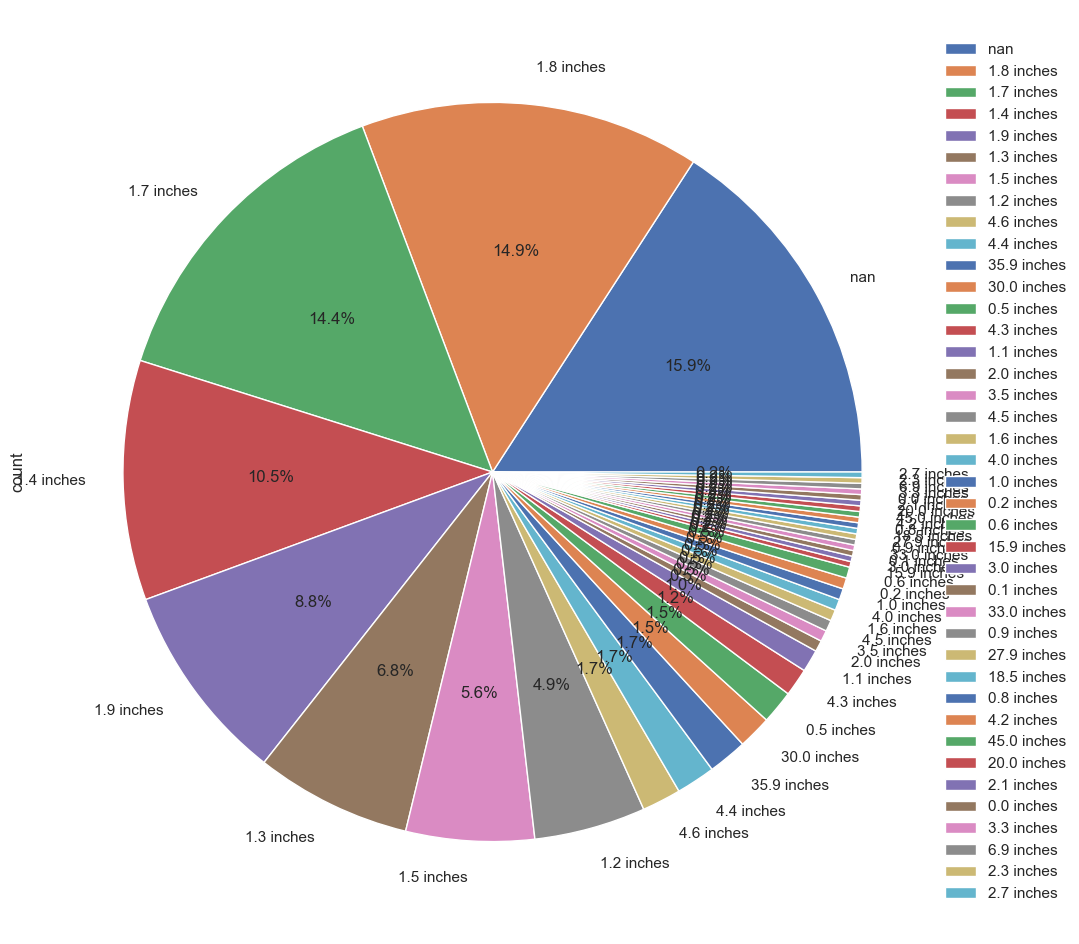

In [64]:

# da li izbaciti celu kolonu?
pyplot.figure(figsize=(8, 8))
pie = data["Display Size"].value_counts().plot(kind='pie',  autopct='%0.1f%%')
pie.figure.legend(loc='right')
pyplot.show()


In [65]:

scale_mapper = {
    '75g +': 1,
    '50 - 75 g': 2,
    '35 - 50 g': 3,
    '20 - 35 g': 4,
    '<= 20 g': 5 }

data1["Weight"] = data["Weight"].replace(scale_mapper)

scale_mapper = {
    'Yes': True,
    'No': False }

data1["Bluetooth"] = data["Bluetooth"].replace(scale_mapper)
data1["Touchscreen"] = data["Touchscreen"].replace(scale_mapper)


data1.head()




,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,True,NaN,3.0
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,True,3.5,True,1.8 inches,2.0
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,True,8.0,True,1.7 inches,3.0
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,True,3.5,True,1.8 inches,1.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,8.0,True,1.7 inches,3.0


In [66]:
data1["Display Size"] = data["Display Size"].str.replace(" inches", "")

data1["Display Size"]  = data["Display Size"].str.replace(" inches", "").astype(float)
data1["Display Size"] = data1["Display Size"].astype(float)

data1["Display Size"]
data1["Display Size"].isnull().sum()

30

In [77]:

list = [1.7, 1.8, 1.9, 1.3, 1.4, 1.6, 1.5, 1.2 , 0.1]
uslov = ~data1["Display Size"].isin(list) & data1['Display Size'].notna()

data1["Display Size"] = np.where(uslov,1,data1["Display Size"])

print(len(data1["Display Size"]))
data1["Display Size"].isnull().sum()


440


30

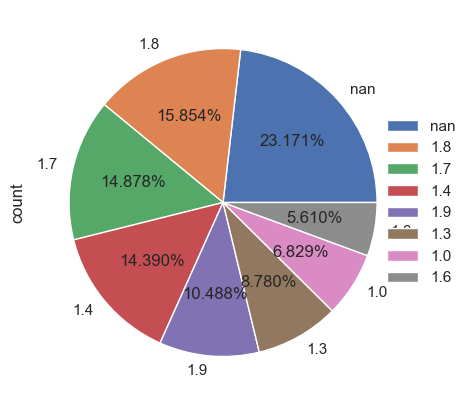

Display Size
1.0    95
1.7    65
1.3    61
1.8    59
1.4    43
0.1    36
1.6    28
1.9    23
Name: count, dtype: int64

In [81]:
pyplot.figure(figsize=(5, 5))
pie = data1["Display Size"].value_counts().plot(kind='pie', labels=data1["Display Size"].unique(), autopct='%0.3f%%')
pie.figure.legend(loc='right')
pyplot.show()

data1["Display Size"].unique()
data1["Display Size"].value_counts()

In [69]:
data1 = data1.

SyntaxError: invalid syntax (1611679023.py, line 1)

In [ ]:
data1 = data1.drop(columns=["Strap Material", "Strap Color", "Dial Shape", "Model Name" ])


In [ ]:
data1

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,True,NaN,3.0
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,True,3.5,True,1.8,2.0
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,True,8.0,True,1.7,3.0
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,True,3.5,True,1.8,1.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,8.0,True,1.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,True,22.0,True,1.3,NaN
446,fire-boltt,3700.0,9999.0,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,True,8.0,True,0.1,NaN
447,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,True,22.0,True,1.3,NaN
448,fire-boltt,3200.0,7999.0,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,True,22.0,True,0.1,NaN


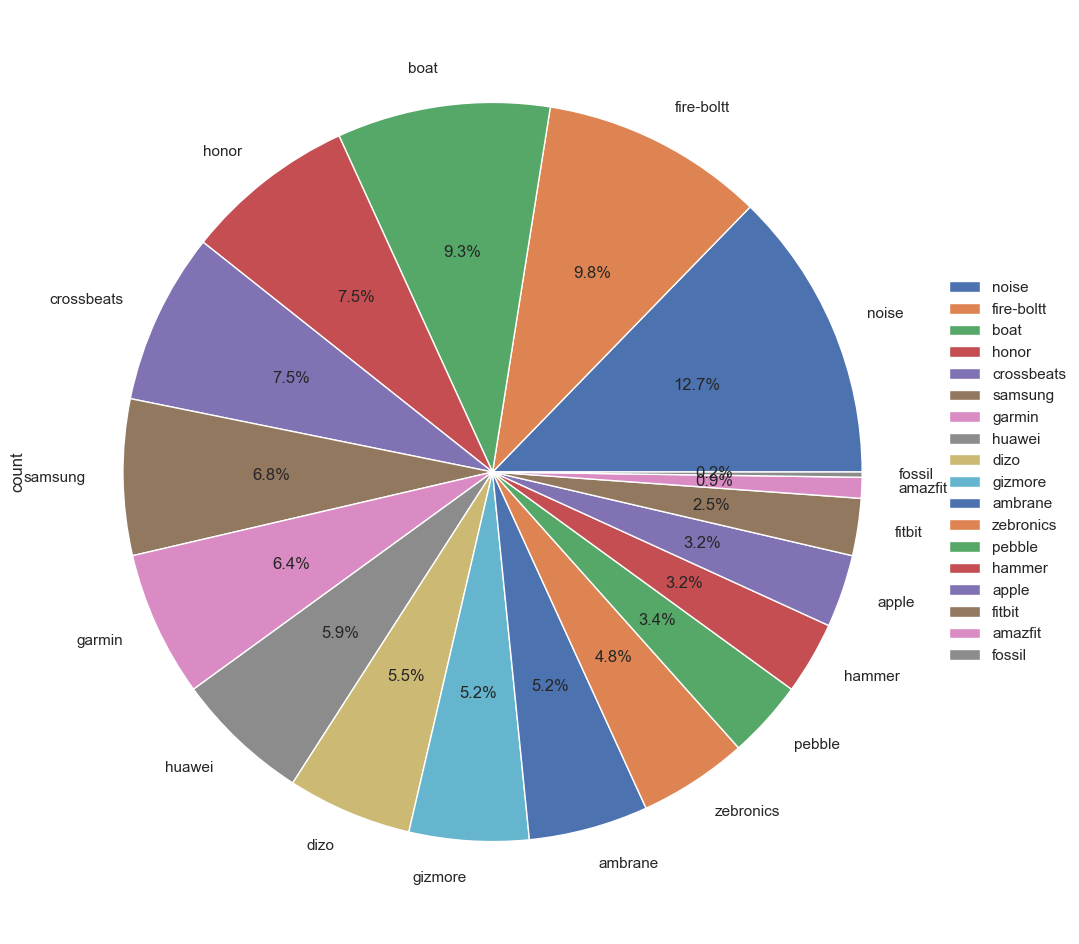

In [ ]:
pyplot.figure(figsize=(8, 8))
pie = data["Brand"].value_counts().plot(kind='pie', labels=data["Brand"].unique(), autopct='%0.1f%%')
pie.figure.legend(loc='right')
pyplot.show()

In [482]:
data1 = data1.drop(columns=['Weight', "Strap Color", "Dial Shape", "Model Name", "Strap Material", "Touchscreen", "Bluetooth" ])

data1 = pd.get_dummies(data=data1, columns=['Brand' ])
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days),Display Size,Brand_amazfit,Brand_ambrane,Brand_apple,...,Brand_fossil,Brand_garmin,Brand_gizmore,Brand_hammer,Brand_honor,Brand_huawei,Brand_noise,Brand_pebble,Brand_samsung,Brand_zebronics
0,82990.0,89900.0,7.686318,4.0,65.0,8.0,NaN,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,3799.0,16999.0,77.651627,4.3,20788.0,3.5,1.8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1999.0,7990.0,74.981227,3.8,21724.0,8.0,1.7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1799.0,19999.0,91.004550,4.3,13244.0,3.5,1.8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1599.0,4999.0,68.013603,4.1,13901.0,8.0,1.7,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,5999.0,8999.0,33.337037,2.5,NaN,22.0,1.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,3700.0,9999.0,62.996300,NaN,NaN,8.0,0.1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
447,5999.0,8999.0,33.337037,2.5,NaN,22.0,1.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
448,3200.0,7999.0,59.994999,NaN,NaN,22.0,0.1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Filling missing values


Strategije popunjavanja:
- mean
- median
- mode
- constant

In [483]:
data1.fillna(data1.mean(),inplace=True)
data1.isna().sum()


Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Brand_amazfit          0
Brand_ambrane          0
Brand_apple            0
Brand_boat             0
Brand_crossbeats       0
Brand_dizo             0
Brand_fire-boltt       0
Brand_fitbit           0
Brand_fossil           0
Brand_garmin           0
Brand_gizmore          0
Brand_hammer           0
Brand_honor            0
Brand_huawei           0
Brand_noise            0
Brand_pebble           0
Brand_samsung          0
Brand_zebronics        0
dtype: int64

In [ ]:
data.isna().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              33
Dial Shape             113
Strap Color            113
Strap Material          66
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [502]:
data1

25

In [486]:
# df_corr = data1.corr()
# pyplot.figure(figsize = (16,16))
# sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
# pyplot.show()

In [487]:


# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(data1)



Elbow Method to determine the number of clusters to be formed:


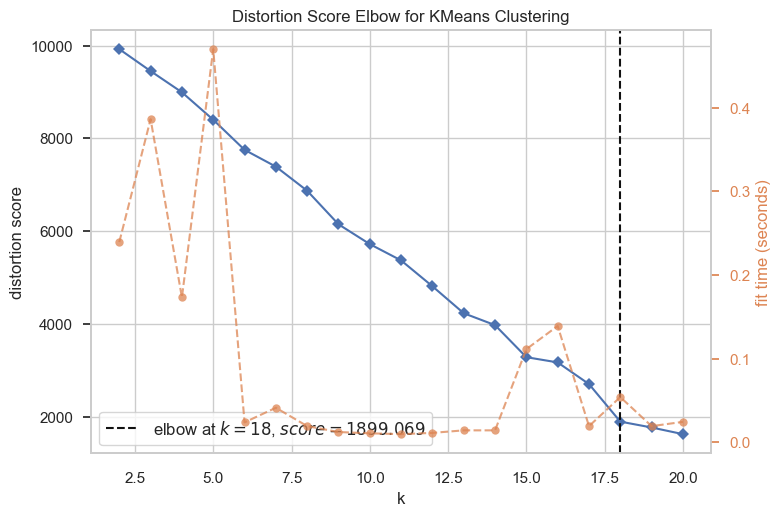

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [510]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(features_std)
Elbow_M.show()

In [511]:

#Ulaz u algoritam
# X = df_pca.values
X = features_std

# Inicijalizacija modela
kmeans = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(X)

y_kmeans = kmeans.predict(X)

# Izračunavanje središta klastera
centroids = kmeans.cluster_centers_

# Izračunavanje klastera za svaki primer
labels = kmeans.labels_



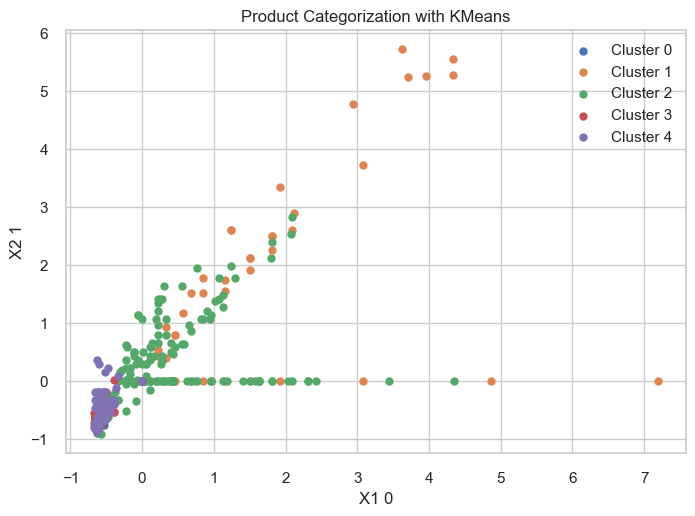

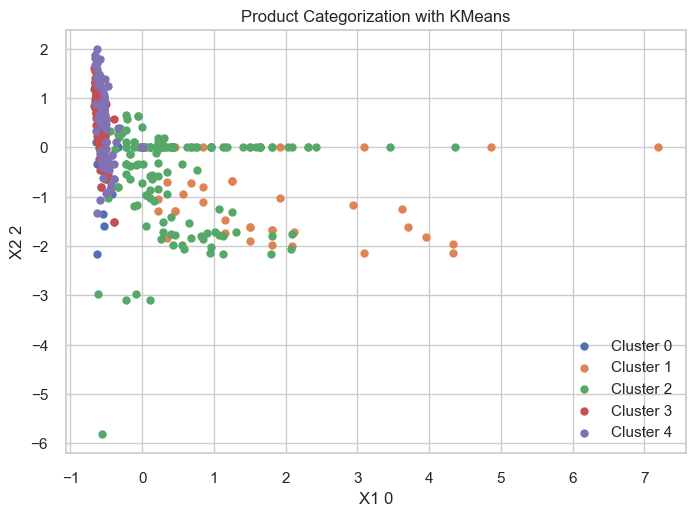

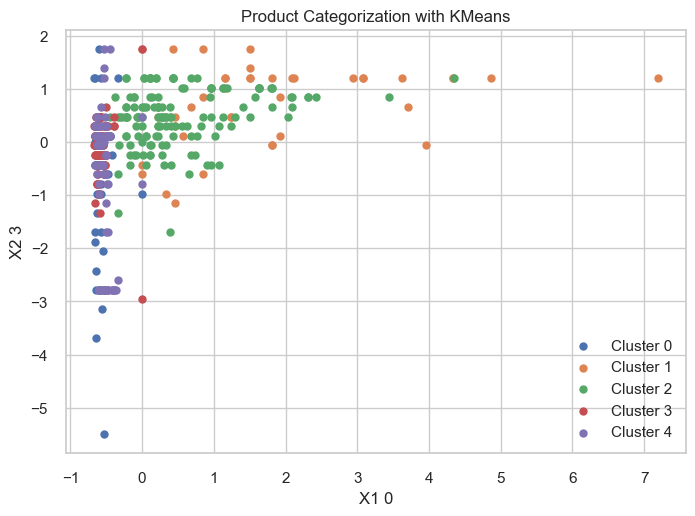

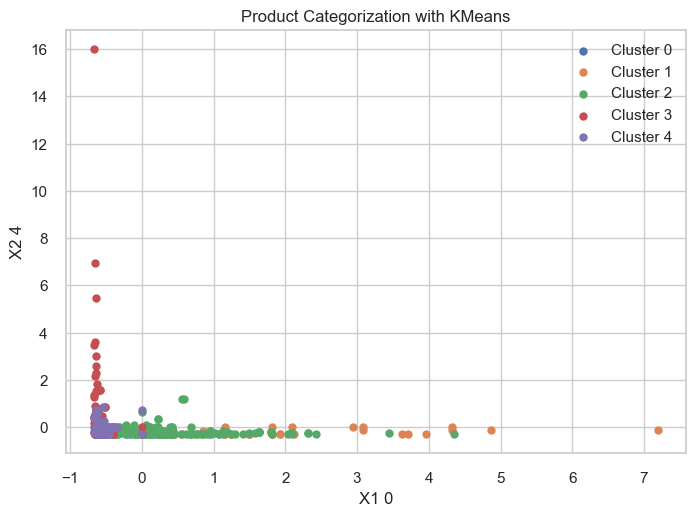

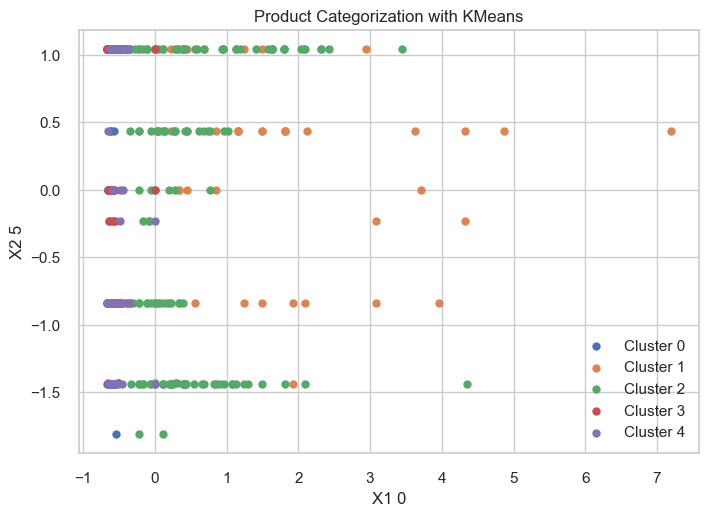

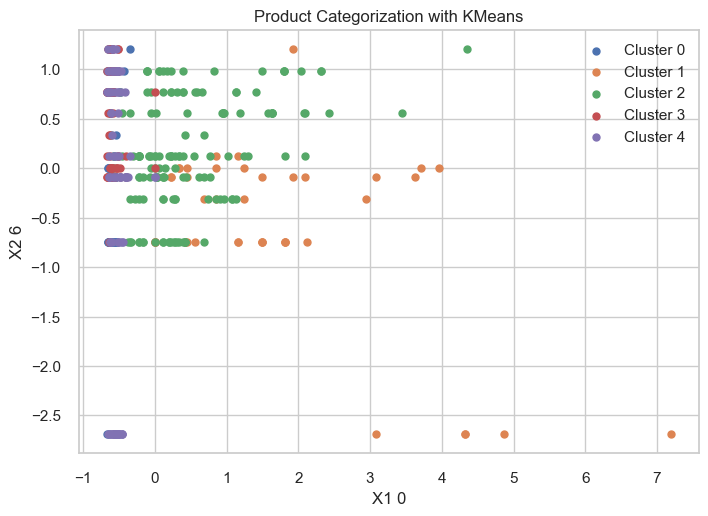

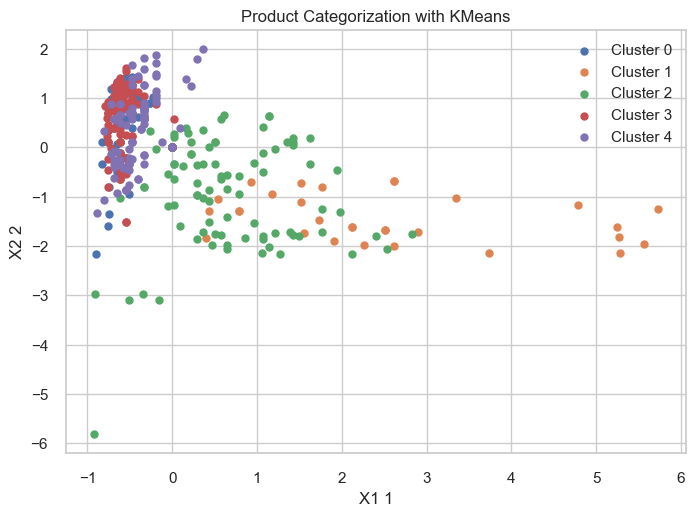

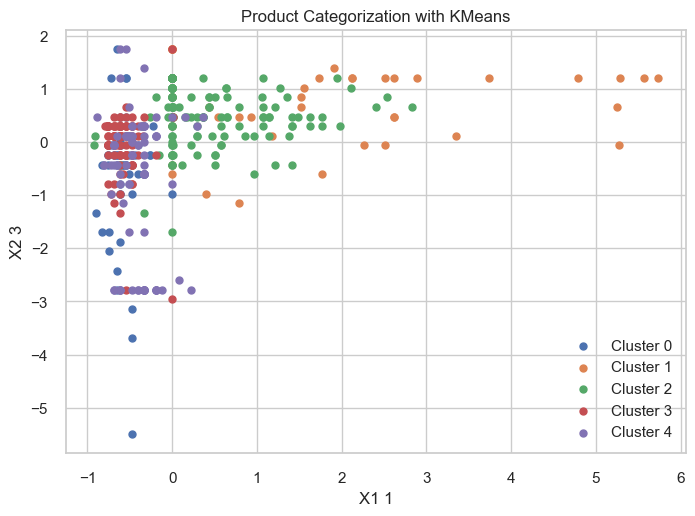

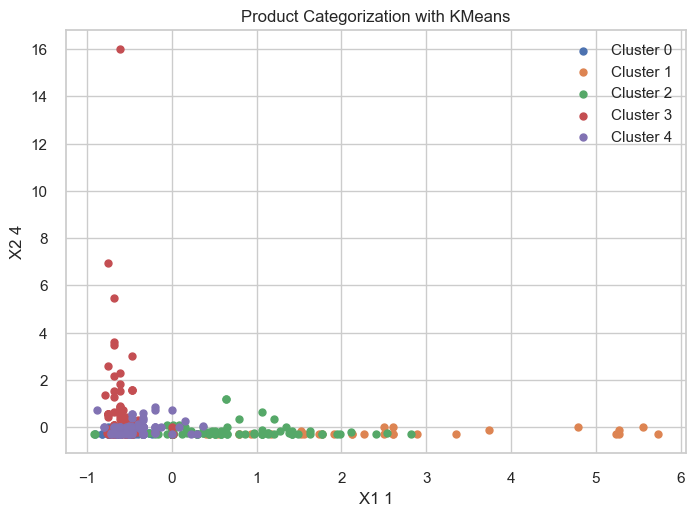

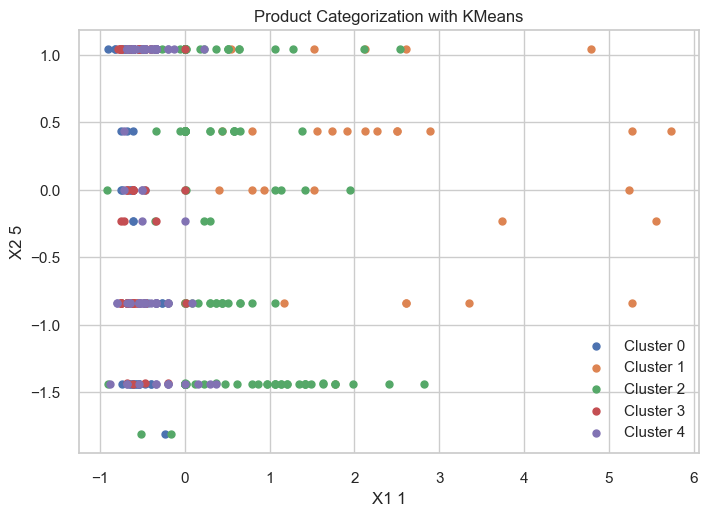

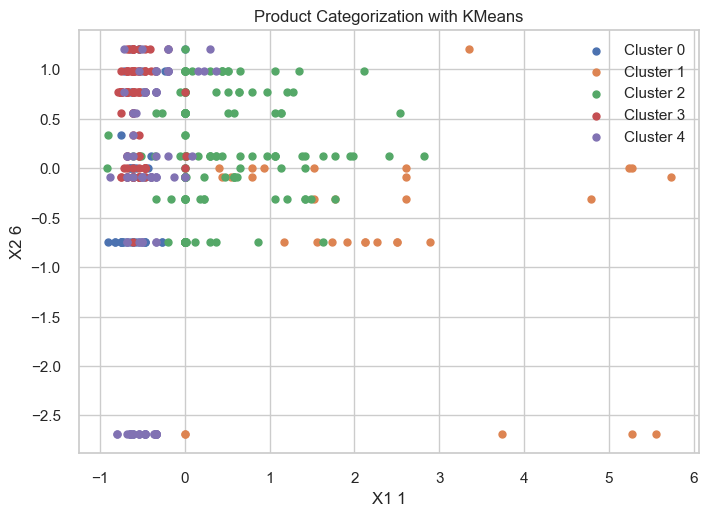

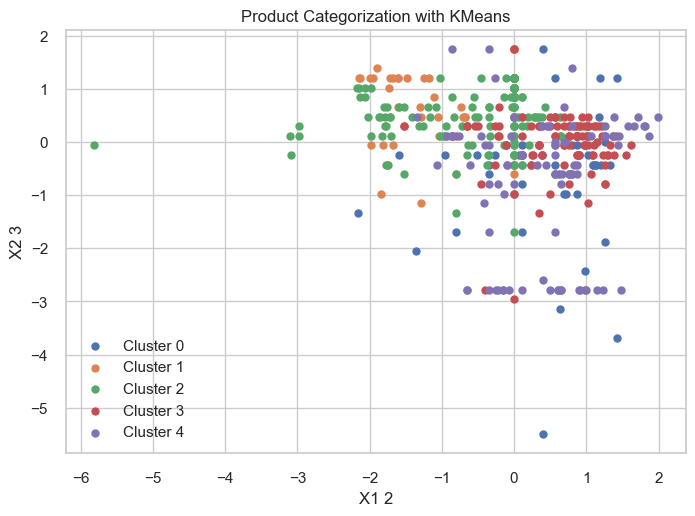

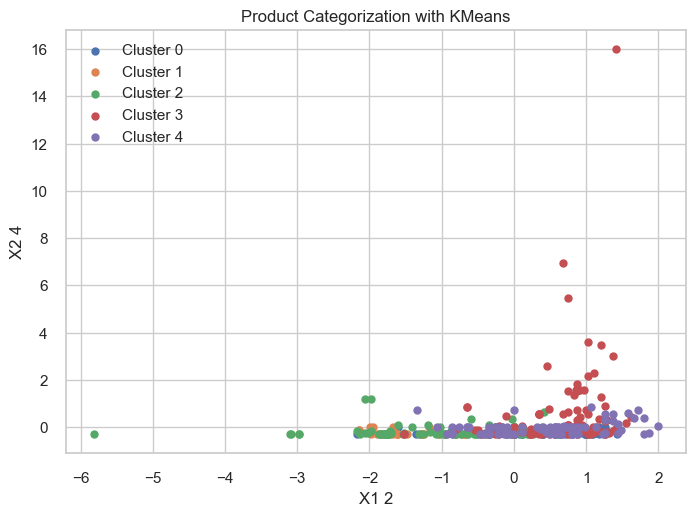

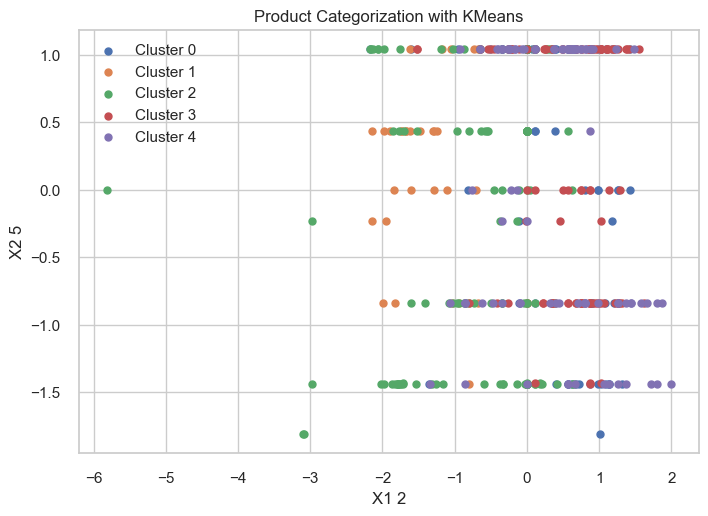

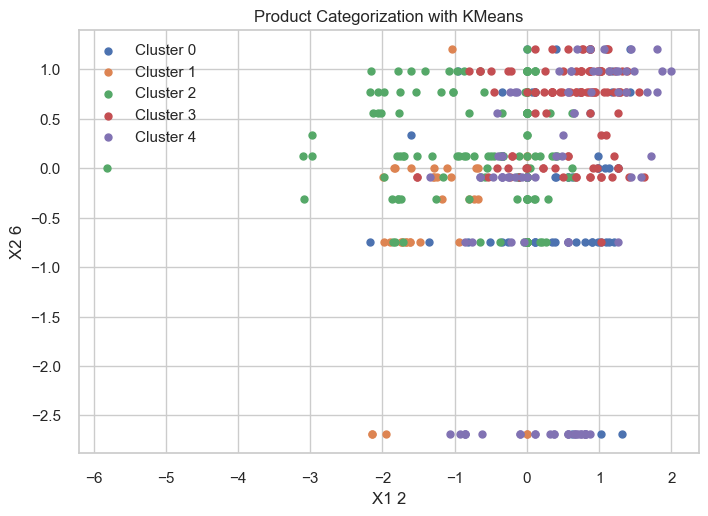

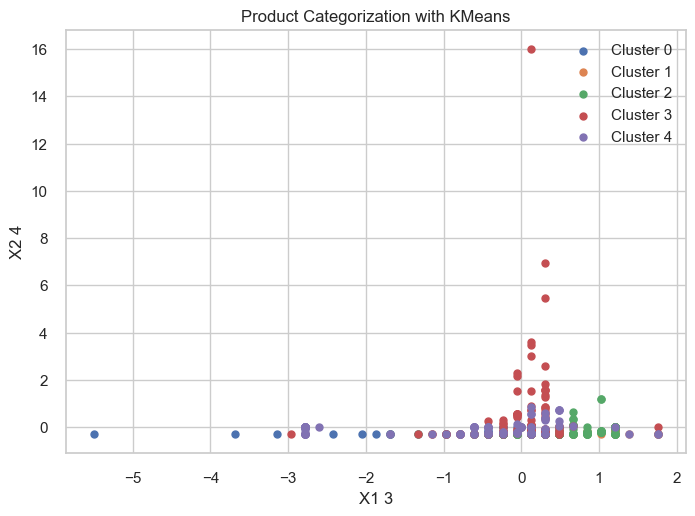

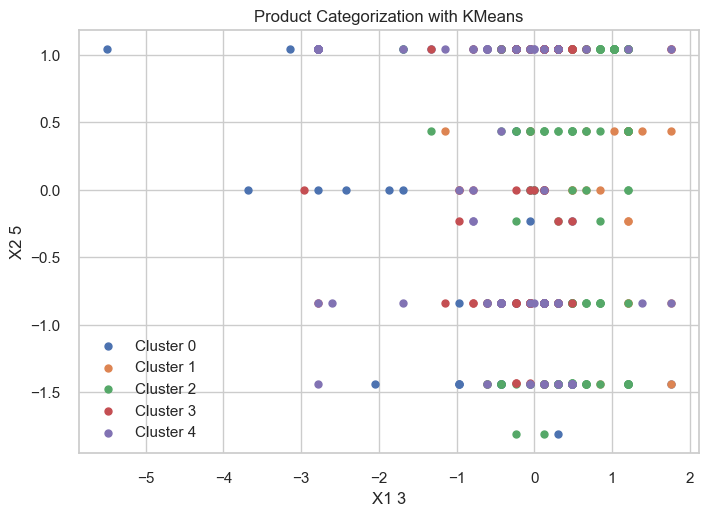

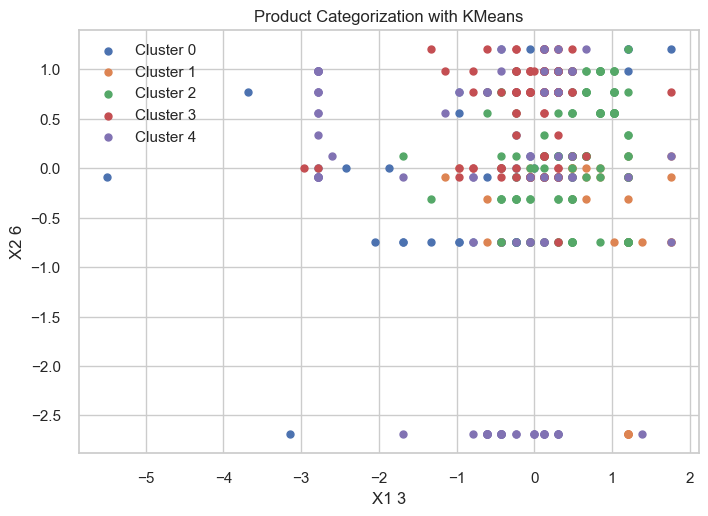

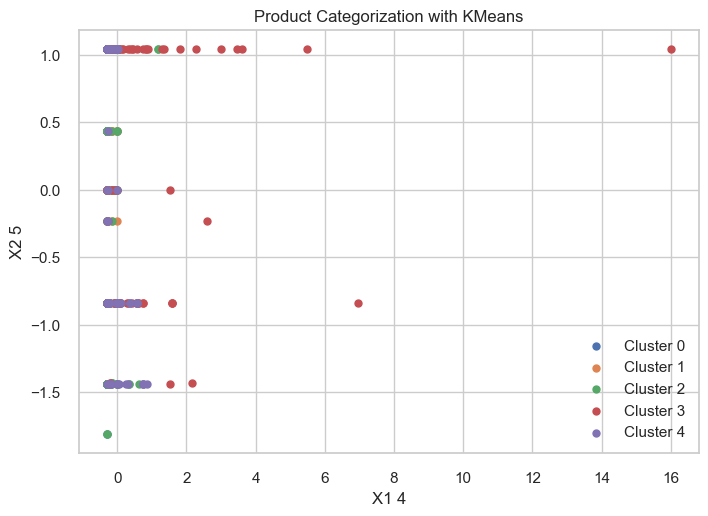

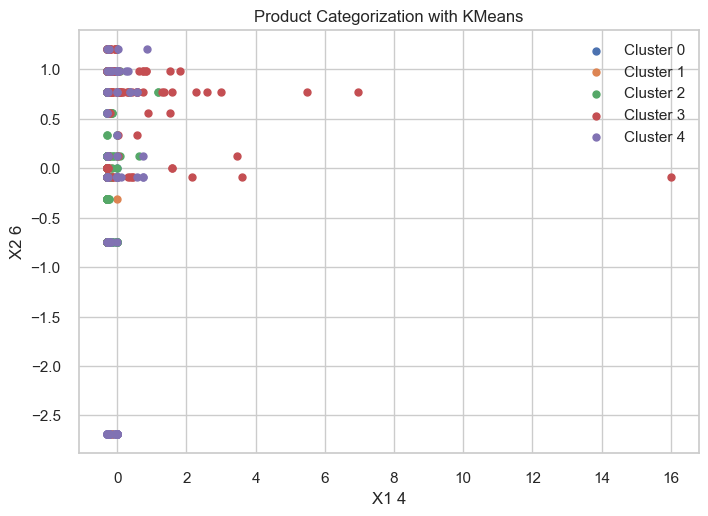

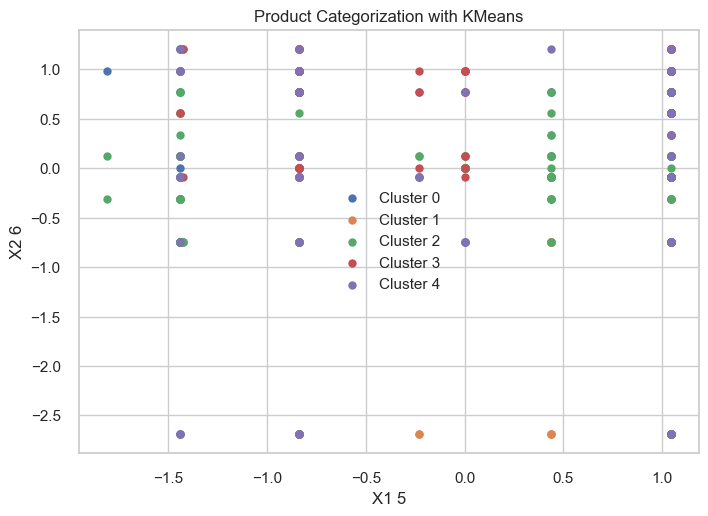

In [516]:
unique_labels = np.unique(y_kmeans)
colors = pyplot.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for i in range(0, 6):
    for j in range(i+1, 7):
        for label, color in zip(unique_labels, colors):
            if label == -1:
                # Display of noise (outlier) points
                pyplot.scatter(X[y_kmeans == label][:, i], X[y_kmeans == label][:,j], s=25, color='black', label='Outlier')
            else:
                # Display of other cluster centers and border points
                pyplot.scatter(X[y_kmeans == label][:, i], X[y_kmeans == label][:, j], s=25,  label=f'Cluster {label}')
        pyplot.title(f'Product Categorization with KMeans')
        pyplot.xlabel(f'X1 {i}')
        pyplot.ylabel(f'X2 {j}')
        pyplot.legend(loc='best')
        pyplot.grid(True)
        pyplot.show()
# for label, color in zip(unique_labels, colors):
#     if label == -1:
#         # Display of noise (outlier) points
#         pyplot.scatter(X[y_kmeans == label][:, 7], X[y_kmeans == label][:,8], s=25, color='black', label='Outlier')
#     else:
#         # Display of other cluster centers and border points
#         pyplot.scatter(X[y_kmeans == label][:, 7], X[y_kmeans == label][:, 8], s=25, color=color, label=f'Cluster {label}')

# pyplot.scatter(centroids[:, 0], centroids[:, 3], marker='x', s=169, linewidths=3, color='r', zorder=10)


In [491]:
from sklearn.cluster import MeanShift

kmeans = MeanShift().fit(X)

y_kmeans = kmeans.predict(X)

# Izračunavanje središta klastera
centroids = kmeans.cluster_centers_

# Izračunavanje klastera za svaki primer
labels = kmeans.labels_


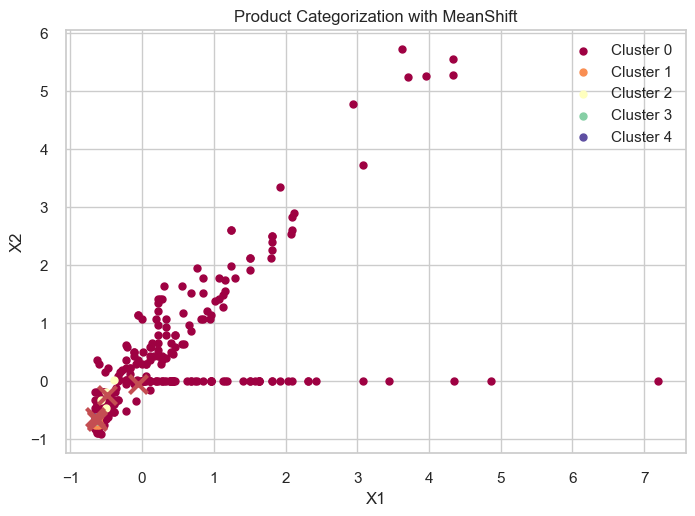

In [492]:

unique_labels = np.unique(y_kmeans)
colors = pyplot.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Display of noise (outlier) points
        pyplot.scatter(X[y_kmeans == label][:, 0], X[y_kmeans == label][:, 1], s=25, color='black', label='Outlier')
    else:
        # Display of other cluster centers and border points
        pyplot.scatter(X[y_kmeans == label][:, 0], X[y_kmeans == label][:, 1], s=25, color=color, label=f'Cluster {label}')

pyplot.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
pyplot.title(f'Product Categorization with MeanShift')
pyplot.xlabel('X1')
pyplot.ylabel('X2')
pyplot.legend(loc='best')
pyplot.grid(True)
pyplot.show()


In [493]:
from sklearn.cluster import DBSCAN
pom = X

dbscan_optimal = DBSCAN()
y_pred = dbscan_optimal.fit_predict(pom)




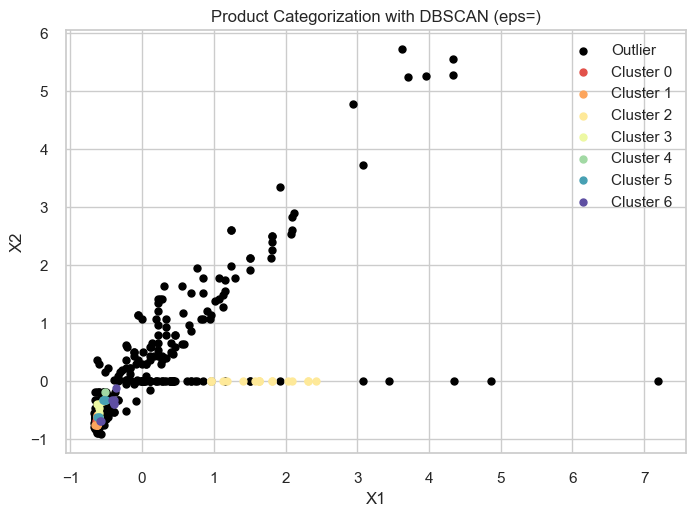

In [494]:
unique_labels = np.unique(y_pred)
colors = pyplot.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Display of noise (outlier) points
        pyplot.scatter(pom[y_pred == label][:, 0], pom[y_pred == label][:, 1], s=25, color='black', label='Outlier')
    else:
        # Display of other cluster centers and border points
        pyplot.scatter(pom[y_pred == label][:, 0], pom[y_pred == label][:, 1], s=25, color=color, label=f'Cluster {label}')

pyplot.title(f'Product Categorization with DBSCAN (eps=)')
pyplot.xlabel('X1')
pyplot.ylabel('X2')
pyplot.legend(loc='best')
pyplot.grid(True)
pyplot.show()